In [2]:
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv('Datos/auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

In [20]:
df.dropna(inplace=True)

Correlación

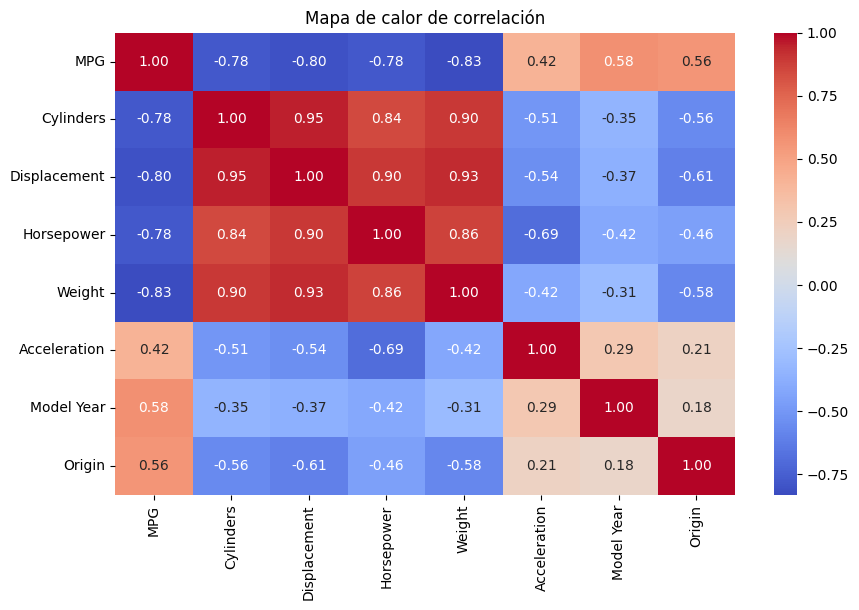

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('Datos/auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                        'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

# Convertir Horsepower a numérico (porque tiene valores '?')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()


Variables escogidas 'Weight', 'Aceleration', 'Model Year', 'Origin'

In [32]:
df = df[['Weight', 'Acceleration', 'Model Year', 'Horsepower', 'MPG']]


Entrenar modelo

In [33]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,Weight,Acceleration,Model Year,Horsepower,MPG
326,2335.0,23.7,80,48.0,43.4
54,1613.0,18.0,71,69.0,35.0
78,2979.0,19.5,72,87.0,21.0
169,2914.0,16.0,75,100.0,20.0
368,2640.0,18.6,82,88.0,27.0


In [34]:
test = df.drop(train.index)
test.head()

,Weight,Acceleration,Model Year,Horsepower,MPG
0,3504.0,12.0,70,130.0,18.0
2,3436.0,11.0,70,150.0,18.0
4,3449.0,10.5,70,140.0,17.0
8,4425.0,10.0,70,225.0,14.0
13,3086.0,10.0,70,225.0,14.0


In [84]:
train_X = train.copy()
test_X = test.copy()

train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

train_X.head()
train_y.head()

326    43.4
54     35.0
78     21.0
169    20.0
368    27.0
Name: MPG, dtype: float64

Capa de Normalización

In [35]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [85]:
var_norm = tf.keras.layers.Normalization(axis=-1)
var_norm.adapt(np.array(train_X[['Weight', 'Acceleration', 'Model Year', 'Horsepower']]))



Modelo 1 capa de normalización y 4 neuronas

In [ ]:

model = tf..Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

print(model.summary())

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_14                │ (None, 4)              │             9 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34 (140.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 9 (40.00 B)

None


In [ ]:
model.compile(
    optimizer=tf..optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

print(train_X.shape[1])


4


In [89]:
%%time
history = model.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 24.1277 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.1545 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.7697 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.7001 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.8789 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 19.4725 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.3692 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.2469 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.0468 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.3092 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.9216 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step -

In [90]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [91]:
hist.head()

,loss,val_loss,epoch
0,23.766932,20.898445,0
1,22.966940,20.098450,1
2,22.166946,19.298458,2
3,21.366953,18.498463,3
4,20.566959,17.698467,4


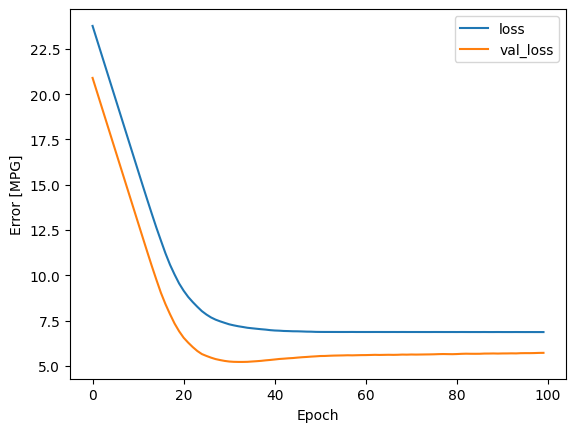

In [92]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

## Modificar número de neuronas

In [93]:
neuronas1 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

neuronas2 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1)
])

neuronas3 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [95]:
neuronas1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

neuronas2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')         

neuronas3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [116]:
%%time
n1 = neuronas1.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)



Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 23.4356 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.5763 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.5233 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.0973 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.6791 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.5736 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.0796 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.3573 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.3618 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.4758 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.3150 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step -

In [117]:
%%time
n2 = neuronas2.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 24.5906 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.8755 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.1738 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.7908 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.6398 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.1429 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.1044 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.4508 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.2485 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.5769 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.1057 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

In [118]:
%%time
n3 = neuronas3.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 23.8913 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.2604 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.5420 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.9580 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.3315 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.1299 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.7855 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.8526 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.5839 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.2979 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.2624 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

In [170]:
ne1 = pd.DataFrame(n1.history)
ne1['epoch'] = n1.epoch

ne2 = pd.DataFrame(n2.history)
ne2['epoch'] = n2.epoch

ne3 = pd.DataFrame(n3.history)
ne3['epoch'] = n3.epoch

ne1.head()

,loss,val_loss,epoch
0,23.766932,20.898445,0
1,22.966938,20.098450,1
2,22.166946,19.298458,2
3,21.366951,18.498463,3
4,20.566956,17.698467,4


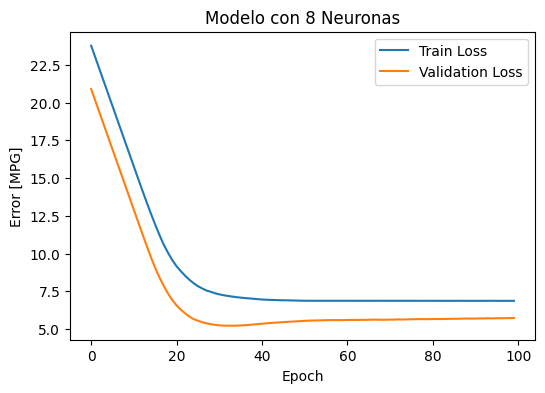

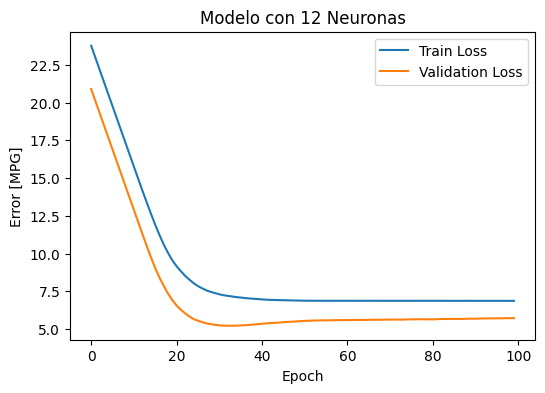

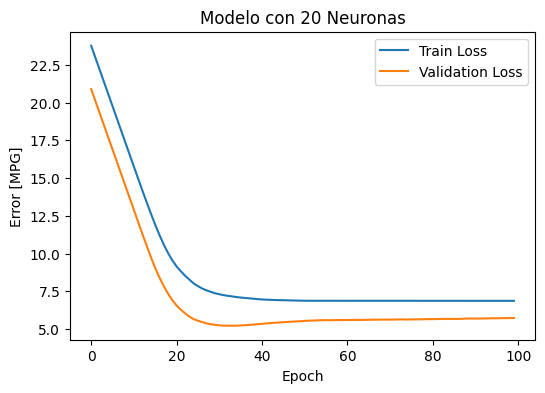

In [120]:
import matplotlib.pyplot as plt

# Gráfico para el modelo con 8 neuronas
plt.figure(figsize=(6, 4))
plt.plot(n1.history['loss'], label='Train Loss')
plt.plot(n1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 8 Neuronas')
plt.legend()
plt.show()

# Gráfico para el modelo con 12 neuronas
plt.figure(figsize=(6, 4))
plt.plot(n2.history['loss'], label='Train Loss')
plt.plot(n2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 12 Neuronas')
plt.legend()
plt.show()

# Gráfico para el modelo con 20 neuronas
plt.figure(figsize=(6, 4))
plt.plot(n3.history['loss'], label='Train Loss')
plt.plot(n3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 20 Neuronas')
plt.legend()
plt.show()


## Modificar Número de Capas

In [109]:
capa1 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

capa2 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

capa3 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
capa1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

capa2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')         

capa3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [121]:
%%time
c1 = capa1.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 24.2456 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.4422 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.6790 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.1331 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.6806 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.2733 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.4286 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 18.8787 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.6295 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.0570 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.0452 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step -

In [122]:
%%time
c2 = capa2.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 24.1683 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.2434 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.4962 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 20.7186 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20.6647 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.0391 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.0532 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.1203 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.6054 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.2118 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.3443 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step -

In [123]:
%%time
c3 = capa3.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 24.0606 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.7037 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.0201 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.8301 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.8564 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.0907 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.7148 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17.5538 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.4401 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.6804 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.7286 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

In [169]:
ca1 = pd.DataFrame(c1.history)
ca1['epoch'] = c1.epoch

ca2 = pd.DataFrame(c2.history)
ca2['epoch'] = c2.epoch

ca3 = pd.DataFrame(c3.history)
ca3['epoch'] = c3.epoch

ca1.head()

,loss,val_loss,epoch
0,23.766933,20.898445,0
1,22.966940,20.098450,1
2,22.166946,19.298458,2
3,21.366951,18.498463,3
4,20.566957,17.698467,4


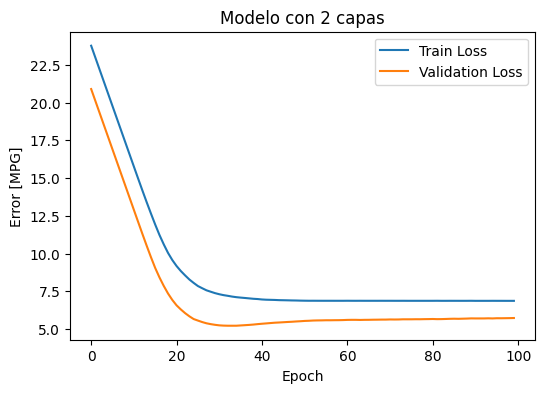

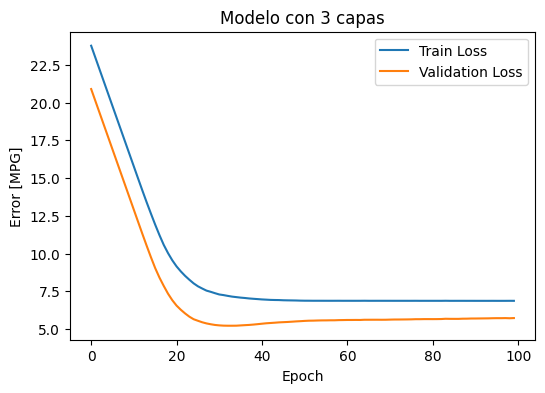

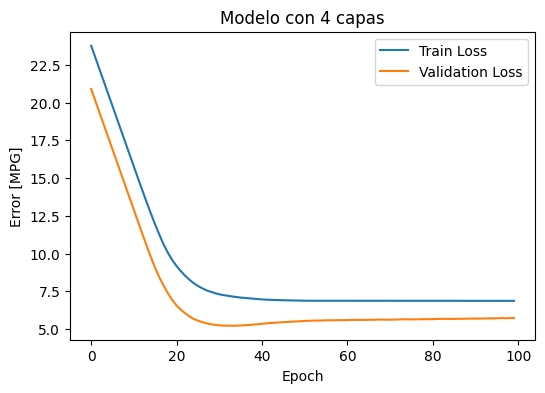

In [125]:
import matplotlib.pyplot as plt

# Gráfico para el modelo con 8 neuronas
plt.figure(figsize=(6, 4))
plt.plot(c1.history['loss'], label='Train Loss')
plt.plot(c1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 2 capas')
plt.legend()
plt.show()

# Gráfico para el modelo con 12 neuronas
plt.figure(figsize=(6, 4))
plt.plot(c2.history['loss'], label='Train Loss')
plt.plot(c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 3 capas')
plt.legend()
plt.show()

# Gráfico para el modelo con 20 neuronas
plt.figure(figsize=(6, 4))
plt.plot(c3.history['loss'], label='Train Loss')
plt.plot(c3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 4 capas')
plt.legend()
plt.show()

## Modificar Funciones de Activación

In [171]:

activacion1 = tf.keras.Sequential([
    var_norm,  
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1) 
])


activacion2 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  
    var_norm,
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])

activacion3 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  
    var_norm,
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(1)
])


In [172]:
activacion1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

activacion2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')         

activacion3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [173]:
%%time
a1 = activacion1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: nan - val_loss: nan
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - val_loss: nan
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - val_loss: nan
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - val_loss: nan
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - val_loss: nan
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - val_loss: nan
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - val_loss: nan
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - val_loss: nan
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - val_l

In [145]:
%%time
a2 = activacion2.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: nan - val_loss: nan
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: nan - val_loss: nan
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan - val_loss: nan
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan - val_loss: nan
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan - val_loss: nan
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: nan - val_loss: nan
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: nan - val_loss: nan
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan - val_loss: nan
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan - val_loss: nan
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan - val_loss: nan
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan - val_loss: nan
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: nan - val_loss: nan
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: na

In [132]:
%%time
a3= activacion3.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: nan - val_loss: nan
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: nan - val_loss: nan
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan - val_loss: nan
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: nan - val_loss: nan
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan - val_loss: nan
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan - val_loss: nan
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan - val_loss: nan
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan - val_loss: nan
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - val_loss: nan
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan - val_loss: nan
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: nan - val_loss: nan
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan - val_loss: nan
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: na

In [174]:
ac1 = pd.DataFrame(a1.history)
ac1['epoch'] = a1.epoch

ac2 = pd.DataFrame(a2.history)
ac2['epoch'] = a2.epoch

ac3 = pd.DataFrame(a3.history)
ac3['epoch'] = a3.epoch

ac1.head()


,loss,val_loss,epoch
0,NaN,NaN,0
1,NaN,NaN,1
2,NaN,NaN,2
3,NaN,NaN,3
4,NaN,NaN,4


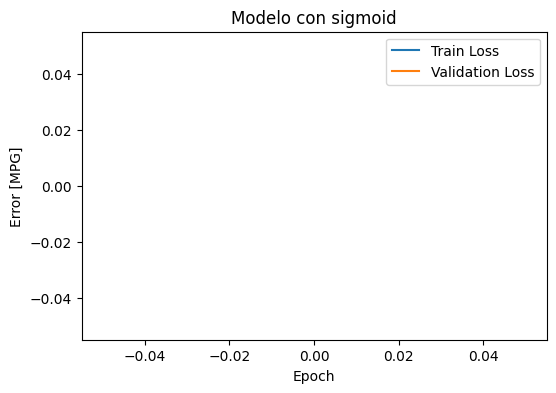

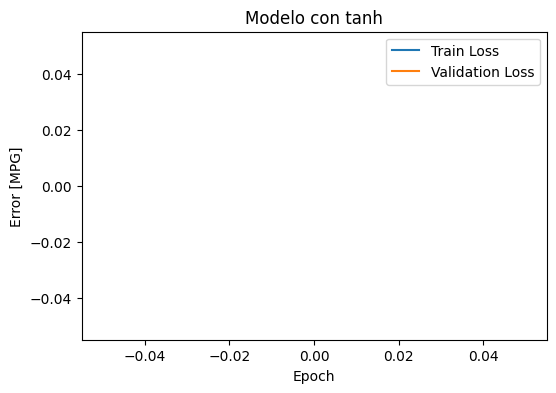

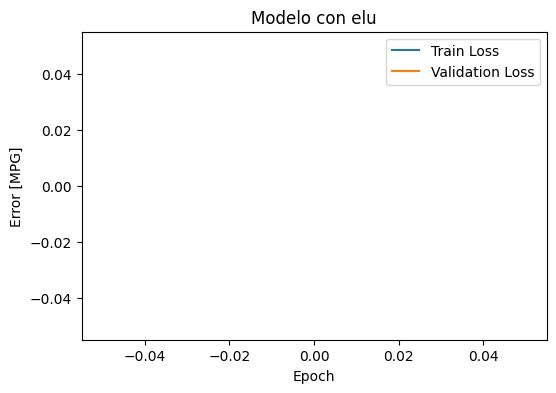

In [140]:
import matplotlib.pyplot as plt

# Gráfico para el modelo con 8 neuronas
plt.figure(figsize=(6, 4))
plt.plot(a1.history['loss'], label='Train Loss')
plt.plot(a1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con sigmoid')
plt.legend()
plt.show()

# Gráfico para el modelo con 12 neuronas
plt.figure(figsize=(6, 4))
plt.plot(a2.history['loss'], label='Train Loss')
plt.plot(a2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con tanh')
plt.legend()
plt.show()

# Gráfico para el modelo con 20 neuronas
plt.figure(figsize=(6, 4))
plt.plot(a3.history['loss'], label='Train Loss')
plt.plot(a3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con elu')
plt.legend()
plt.show()